In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_meta = pd.read_csv('../../processed_data/clean_data/metadata.csv', index_col = 0)

In [3]:
df_freq = pd.read_csv('../dream_v10k/gene_qc.csv', index_col = 0)

In [4]:
df = pd.read_csv('./dream_degs.csv')

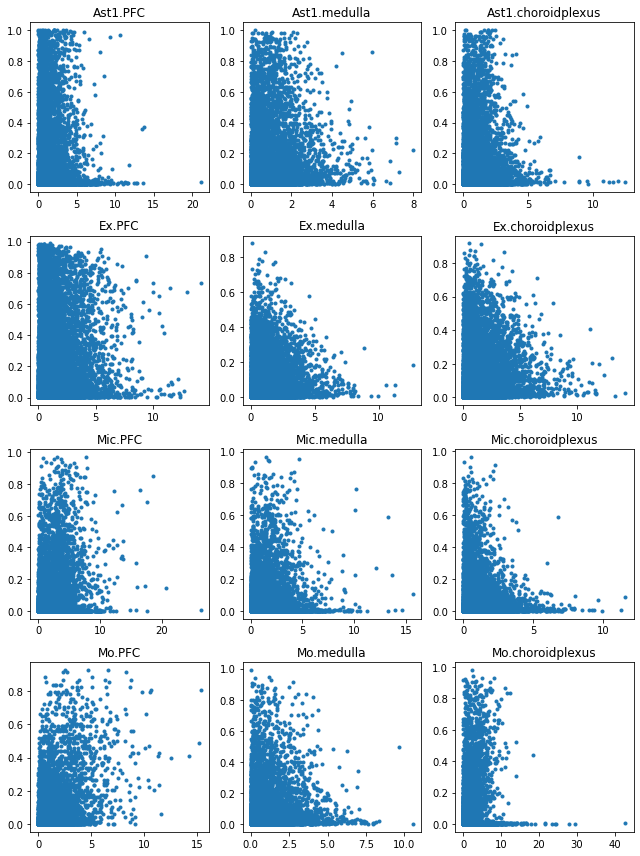

In [8]:
import numpy as np
fig, axes = plt.subplots(4, 3, figsize = (9, 12))

for i, ct in enumerate(['Ast1', 'Ex', 'Mic', 'Mo']):
    for j, tissue in enumerate(['PFC', 'medulla', 'choroidplexus']):
        tmp = df[(df.Tissue == tissue) & (df.CellType == ct)]
        plt.sca(axes[i, j])
        key = '.'.join([ct, tissue])
        plt.plot(-np.log(tmp['P.Value']), df_freq.loc[tmp.Gene, key], '.')
        plt.title(key)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import glob
from statsmodels.stats import multitest
import numpy as np

In [10]:
id2ct = sorted(set(df.CellType))
id2tissue = sorted(set(df.Tissue))

df_up = pd.DataFrame(0, index = id2tissue, columns = id2ct)
df_dn = pd.DataFrame(0, index = id2tissue, columns = id2ct)

for (c, t), tmp in df.groupby(['CellType', 'Tissue']):
    vec = df_freq['.'.join([c, t])]
    vec = set(vec[vec.values > 0.01].index)
    tmp = tmp[[g in vec for g in tmp.Gene]]
    tmp['fdr'] = multitest.multipletests(tmp['P.Value'].values, method='fdr_bh')[1]
    n_up = np.sum((tmp.fdr < 0.05) & (tmp.logFC > 0))
    n_dn = np.sum((tmp.fdr < 0.05) & (tmp.logFC < 0))
    df_up.loc[t, c] = n_up
    df_dn.loc[t, c] = n_dn

<ipython-input-10-eb4ffa34d11a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['fdr'] = multitest.multipletests(tmp['P.Value'].values, method='fdr_bh')[1]
<ipython-input-10-eb4ffa34d11a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['fdr'] = multitest.multipletests(tmp['P.Value'].values, method='fdr_bh')[1]
<ipython-input-10-eb4ffa34d11a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<ipython-input-10-eb4ffa34d11a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['fdr'] = multitest.multipletests(tmp['P.Value'].values, method='fdr_bh')[1]
<ipython-input-10-eb4ffa34d11a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['fdr'] = multitest.multipletests(tmp['P.Value'].values, method='fdr_bh')[1]
<ipython-input-10-eb4ffa34d11a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [11]:
df_all = df_up + df_dn
ind = np.any(df_all > 9, axis = 0)
ind = ind[ind.values].index
ind = df_all[ind].sum(axis = 0).sort_values(ascending = False).index

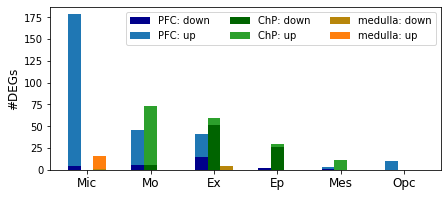

In [12]:
plt.figure(figsize = (7, 3))
colors = [('tab:blue', 'darkblue'), ('tab:green', 'darkgreen'), ('tab:orange', 'darkgoldenrod')]

for i, t in enumerate(df_up.index):   
    if t == 'choroidplexus':
        key = 'ChP'
    else:
        key = t
        
    plt.bar( [p -0.2 + 0.2*i for p in range(6)], 
             df_dn.loc[t, ind].values,
             0.2, facecolor = colors[i][1], label = key + ': down')
        
    plt.bar( [p -0.2 + 0.2*i for p in range(6)], 
            df_up.loc[t, ind].values, 0.2, 
            bottom = df_dn.loc[t, ind].values,  
            facecolor = colors[i][0], label = key + ': up')


plt.legend(ncol = 3, fontsize = 10)
plt.ylabel('#DEGs', fontsize = 12)
plt.xticks(range(6), ind.values, fontsize = 12)
plt.savefig('../../figs/degs_count.pdf')
plt.savefig("../../figs/png/degs_count.png", dpi = 600)
plt.show()

In [13]:
df_dn

,Ast1,Ast2,End,Ep,Epi,Ex,In,LM,Mes,Mic,Mo,Oli,Opc,Peri1,Peri2
PFC,0,0,0,2,5,15,0,0,1,4,5,0,0,0,0
choroidplexus,1,2,1,26,3,51,2,0,0,0,6,2,0,2,0
medulla,0,1,0,0,1,4,0,0,0,1,0,0,0,0,0


In [14]:
df_all

,Ast1,Ast2,End,Ep,Epi,Ex,In,LM,Mes,Mic,Mo,Oli,Opc,Peri1,Peri2
PFC,7,0,3,2,5,41,0,0,3,178,46,0,10,0,0
choroidplexus,5,2,5,29,4,59,3,0,11,0,73,2,0,2,0
medulla,0,4,0,0,2,4,0,0,0,16,0,0,0,0,0
